In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(style="ticks")

In [3]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(path, encoding='latin1')

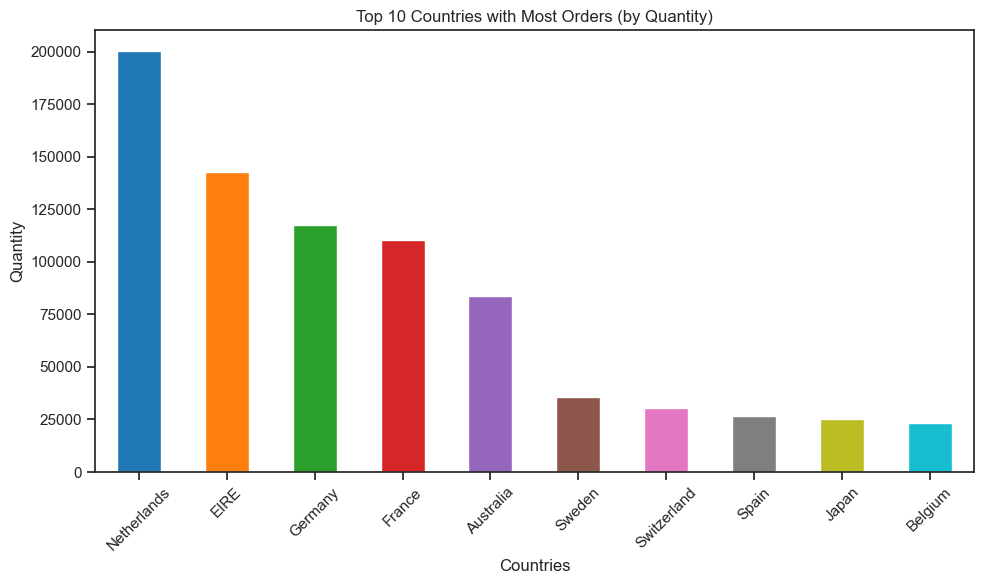

In [4]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()
# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]
# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)
# top three countries
top_countries = ['Netherlands', 'EIRE', 'Germany']
# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]
#################
# Graph Section #
#################
# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
# adds legend
g.add_legend()

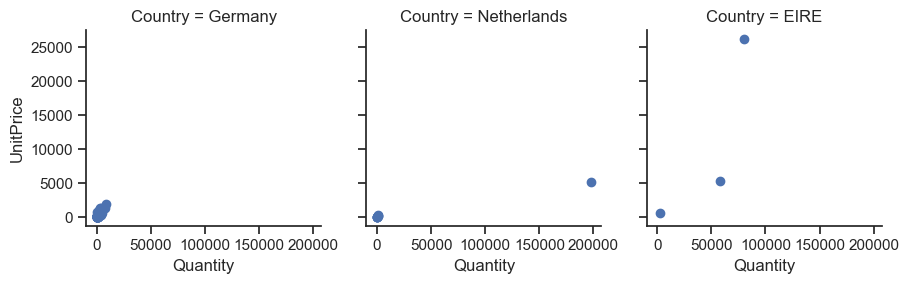

In [7]:
plt.show()

In [8]:
customers = online_rt.groupby(['CustomerID','Country']).sum().head()
customers

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice
CustomerID,Country,,,,,,
12346.0,United Kingdom,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04
12347.0,Iceland,5376265376265376265376265376265376265376265376...,8511622375714772249222771227722277322774227752...,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,2458,12/7/10 14:5712/7/10 14:5712/7/10 14:5712/7/10...,481.21
12348.0,Finland,5393185393185393185393185393185393185393185393...,8499222951849918499121213212132261621981219822...,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2341,12/16/10 19:0912/16/10 19:0912/16/10 19:0912/1...,178.71
12349.0,Italy,5776095776095776095776095776095776095776095776...,2311223460215642141121563221312219548194849782...,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,631,11/21/11 9:5111/21/11 9:5111/21/11 9:5111/21/1...,605.10
12350.0,Norway,5430375430375430375430375430375430375430375430...,219082241279066K79191C2234884086C2255122557218...,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,197,2/2/11 16:012/2/11 16:012/2/11 16:012/2/11 16:...,65.30


In [9]:
customers.UnitPrice.dtype

dtype('float64')

In [10]:
display(online_rt[online_rt.CustomerID == 12347.0].
 sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
 sort_values(by='UnitPrice', ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
220577,556201,23173,REGENCY TEAPOT ROSES,2,6/9/11 13:01,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [11]:
sales_volume = (
    online_rt.groupby('Country')
             .Quantity.sum()
             .sort_values(ascending=False)
)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [12]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [13]:
# Filter and group by CustomerID and Country
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID', 'Country'])

# Sum Quantity and Revenue correctly (using double brackets for multiple columns)
plottable = grouped[['Quantity', 'Revenue']].agg('sum')

# Calculate average price per item
plottable['AvgPrice'] = plottable['Revenue'] / plottable['Quantity']

# Add Country as a column from the index
plottable['Country'] = plottable.index.get_level_values(1)

# Preview the data
plottable.head()


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


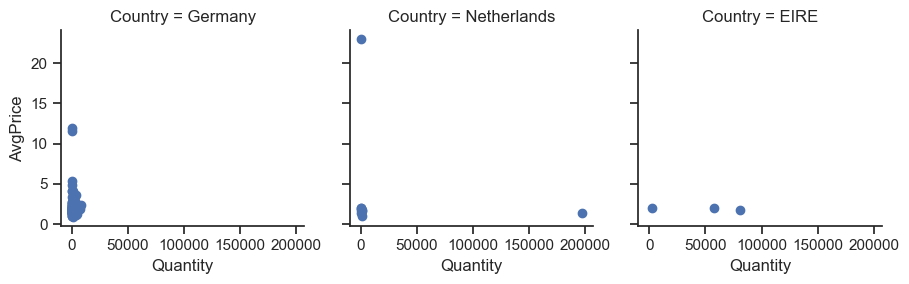

In [14]:
####################
# Graph Section v 2#
####################
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")
# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
# adds legend
g.add_legend()
plt.show()

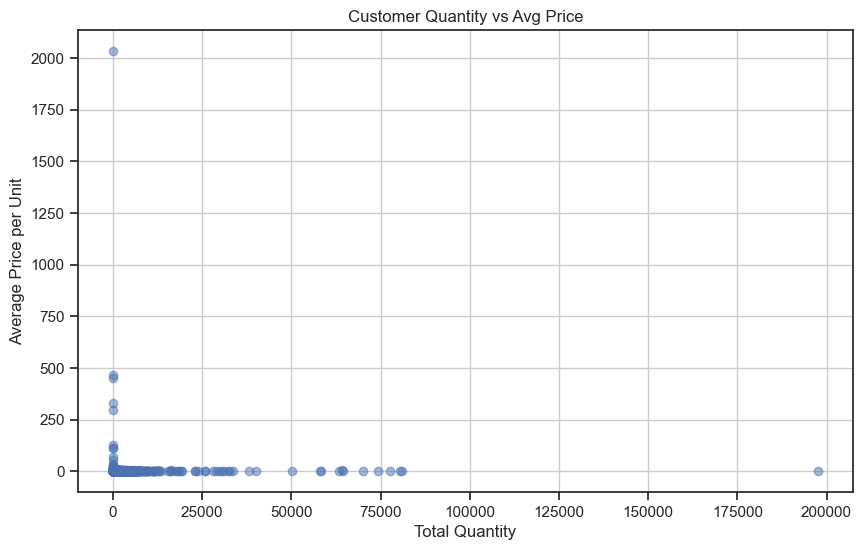

In [19]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped[['Quantity', 'Revenue']].agg('sum')  # <-- use double brackets here

# Calculate average price
plottable['AvgPrice'] = plottable['Revenue'] / plottable['Quantity']

# Create scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(plottable['Quantity'], plottable['AvgPrice'], alpha=0.5)
plt.xlabel('Total Quantity')
plt.ylabel('Average Price per Unit')
plt.title('Customer Quantity vs Avg Price')
plt.grid(True)
plt.show()


In [16]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
 'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity
# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)
plt.plot()


[]

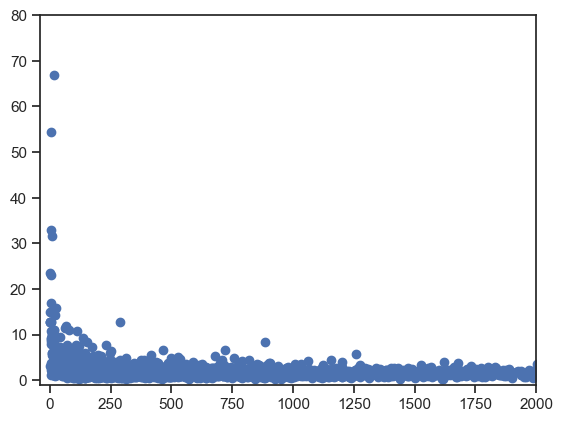

In [17]:
plt.show()

In [18]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0
price_end = 50
price_interval = 1
#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)
#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice,buckets)).Revenue.sum()
revenue_per_price.head()
UnitPrice
(0, 1] 1.107775e+06
(1, 2] 2.691765e+06
(2, 3] 2.024143e+06
(3, 4] 8.651018e+05
(4, 5] 1.219377e+06
Name: Revenue, dtype: float64

_IncompleteInputError: incomplete input (2309358534.py, line 12)